In [1]:
from torch.utils.tensorboard import SummaryWriter

In [ ]:
import numpy as np
r = 6
writer = SummaryWriter(log_dir=r"G:\ML\PYLearn\jupyter\log")
for i in range(100):
    writer.add_scalar("y=x", i**2, i)
    writer.add_scalars("y", {'xsinx':i*np.sin(i/r),
                            'xcosx':i*np.cos(i/r)},i)
writer.close()

In [2]:
def y_data(tmp_x):
    y = tmp_x**2 
    return y

from torch.utils.data import Dataset
from torch import  FloatTensor
class UserDataset(Dataset):
    def __init__(self, doc="dataset"):
        self.doc = doc
        x = list(range(0,100,3))
        self.x =  FloatTensor(x).view(-1, 1)
        y = list(map(y_data,x))
        self.y = FloatTensor(y).view(-1, 1)
 
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.x)

In [3]:
from torch.utils.data import DataLoader
user_dataset = UserDataset()
user_loader = DataLoader(user_dataset, batch_size=32, shuffle=True)

In [4]:
import torch.nn as nn
class reg_model(nn.Module):
    def __init__(self, in_dim, out_dim=1):
        super(reg_model, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
#         self.model = nn.Sequential(nn.Linear(in_dim, 16), nn.ReLU(),nn.Linear(16, out_dim))
        self.fc1 = nn.Linear(in_dim, 16)
        self.act   = nn.ReLU()
        self.fc2 = nn.Linear(16, out_dim)
        
    def forward(self,x):
#         y = self.model(x)
        x = self.fc1(x)
        x = self.act(x)
        y = self.fc2(x)
        return y

In [23]:
from torch import optim
import torch
model = reg_model(1,1)
criterior = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)
writer = SummaryWriter(log_dir=r"G:\ML\PYLearn\jupyter\log")
for i in range(2):
    for x, y in user_loader:
        optimizer.zero_grad()
        pred_y = model(x)
        loss = criterior(pred_y, y)
        loss.backward()
        optimizer.step()
        writer.add_scalar("train_loss", loss,i)
    for name, parms in model.named_parameters(): 
        print('-->name:', name, '-->grad_requirs:',parms, \
         ' -->grad_value:',parms.grad)
#     for param_tensor in model.state_dict():  # 字典的遍历默认是遍历 key，所以param_tensor实际上是键值
#         print(param_tensor, '\t', model.state_dict()[param_tensor])
# for param_tensor in model.state_dict():  # 字典的遍历默认是遍历 key，所以param_tensor实际上是键值
#     print(param_tensor, '\t', model.state_dict()[param_tensor])

-->name: fc1.weight -->grad_requirs: Parameter containing:
tensor([[ 0.6959],
        [-0.8636],
        [ 0.5841],
        [ 0.5930],
        [-0.7232],
        [ 0.5257],
        [ 0.7659],
        [-0.7176],
        [-0.2972],
        [-0.3137],
        [ 0.3248],
        [-0.1091],
        [-0.9199],
        [-0.6800],
        [ 0.6387],
        [-0.6191]], requires_grad=True)  -->grad_value: tensor([[ 123424.4297],
        [      0.0000],
        [-182706.0312],
        [-181317.5938],
        [      0.0000],
        [-220881.9062],
        [-121321.0625],
        [      0.0000],
        [      0.0000],
        [      0.0000],
        [-110097.4688],
        [      0.0000],
        [      0.0000],
        [      0.0000],
        [-123621.5547],
        [      0.0000]])
-->name: fc1.bias -->grad_requirs: Parameter containing:
tensor([ 0.1699,  0.3588, -0.6049,  0.9664, -0.8253, -0.3288, -0.1872, -0.4760,
         0.1866, -0.9741, -0.3064, -0.7403, -0.2083, -0.3849, -0.0347, -0.2916

In [21]:
model.state_dict().keys()

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])

In [40]:
x = list(range(0,100))
y = list(map(y_data, x))
x = torch.unsqueeze(FloatTensor(x),dim=1)
model.eval()
with torch.no_grad():
    pred_y = model(x)

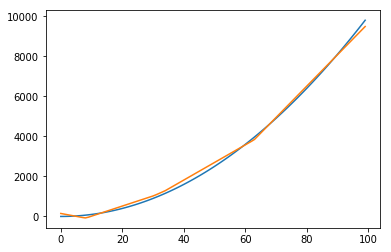

In [41]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.plot(x, pred_y.detach().numpy())

In [47]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
fc1.weight 	 torch.Size([16, 1])
fc1.bias 	 torch.Size([16])
fc2.weight 	 torch.Size([1, 16])
fc2.bias 	 torch.Size([1])


In [49]:
optimizer.state_dict?

Signature: optimizer.state_dict()
Docstring:
Returns the state of the optimizer as a :class:`dict`.

It contains two entries:

* state - a dict holding current optimization state. Its content
    differs between optimizer classes.
* param_groups - a dict containing all parameter groups
File:      c:\programdata\anaconda3\lib\site-packages\torch\optim\optimizer.py
Type:      method


In [48]:
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Optimizer's state_dict:
state 	 {0: {'step': 6000, 'exp_avg': tensor([[ 3.4952e+04],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 5.6052e-45],
        [ 2.2232e+04],
        [-8.6573e+04],
        [ 4.2950e+04],
        [ 2.2401e+04],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-1.0213e+05],
        [-1.3310e+05],
        [ 2.1657e+04],
        [ 0.0000e+00],
        [ 0.0000e+00]]), 'exp_avg_sq': tensor([[1.7020e+10],
        [0.0000e+00],
        [0.0000e+00],
        [3.4815e+04],
        [9.8124e+09],
        [1.4238e+11],
        [2.4256e+10],
        [9.9775e+09],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [1.4763e+11],
        [3.3066e+11],
        [9.3116e+09],
        [0.0000e+00],
        [0.0000e+00]])}, 1: {'step': 6000, 'exp_avg': tensor([ 3.8946e+02,  0.0000e+00,  0.0000e+00,  5.6052e-45,  1.9953e+02,
        -8.0688e+02,  4.7163e+02,  2.0104e+02,  0.0000e+00,  0.0000e+00,
         5.6052e-45, -2.

In [50]:
torch.save({
            'epoch': 1000,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, r"G:\ML\PYLearn\jupyter\log\model.pth")

In [52]:
checkpoint = torch.load(r"G:\ML\PYLearn\jupyter\log\model.pth")
# checkpoint

In [53]:
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']